In [360]:
import pandas as pd

pip install quandl

In [361]:
import quandl, datetime
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import pickle

In [362]:
df = quandl.get("WIKI/GOOGL")
print(df.head())


              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [363]:
#defining the features you will need in the dataframe
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
print(df.head())


            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [364]:
forecast_col = 'Adj. Close'
#replace all NaN elements with -99999 if true
df.fillna(-99999, inplace=True)

#print the length of the data frame
print(len(df))

3424


In [365]:
#ceil gives the smallest integar >= x
forecast_out = int(math.ceil(0.1*len(df)))
print(forecast_out)
#take the last 35 column of forecast_col and shift upward 
df['label'] = df[forecast_col].shift(-forecast_out)


343


In [366]:
print(df.head())
print(df.tail())



            Adj. Close    HL_PCT  PCT_change  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  3.712563    0.324968   44659000.0  214.005615
2004-08-20   54.322689  0.710922    7.227007   22834300.0  210.725489
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  1.886792    1.183658    9188600.0  223.309335
            Adj. Close    HL_PCT  PCT_change  Adj. Volume  label
Date                                                            
2018-03-21     1094.00  1.343693    0.130884    1990515.0    NaN
2018-03-22     1053.15  2.921711   -2.487014    3418154.0    NaN
2018-03-23     1026.55  3.918952   -2.360729    2413517.0    NaN
2018-03-26     1054.09  0.491419    0.332191    3272409.0    NaN
2018-03-27     1006.94  5.720301   -5.353887    2940957.0    NaN


In [367]:
#drop label(Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
# and covert the df to an array
X = np.array(df.drop(['label'],1))
#scaling the data, i.e to standardize or normalize
X = preprocessing.scale(X)
#from -34th value to the end
x_lately = X[-forecast_out:]

#from the zero index to the index before the -34th value
X = X[:-forecast_out]
#remove missing value
df.dropna(inplace=True)
y = np.array(df['label'])

# training(fit) and testing(score) your data, n_jobs =number of jobs at a time, default for reg =1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#clf = LinearRegression(n_jobs=-1)
#clf.fit(X_train, y_train)
#clf = svm.SVR(kernel= 'poly')

#with open('linearregression.pickle','wb') as f:
    #pickle.dump(clf, f) #save

pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)
accuracy = clf.score(X_test,y_test)
print(accuracy)



0.7426362769885246


In [368]:
forecast_set = clf.predict(x_lately)
print(forecast_set, accuracy, forecast_out)


[564.39829378 555.01772059 558.8162064  569.58101627 584.69066918
 595.50248838 597.44714228 613.15372505 708.12487042 705.52653355
 706.30358835 704.72045502 685.35451959 665.08351119 670.01390507
 674.20639569 676.550734   678.2377035  671.7000724  679.01489542
 675.42252473 686.13463514 684.80242249 679.25430523 676.7243238
 701.80515057 705.85352862 700.3812546  703.83998792 709.22406891
 702.88038239 707.35636793 691.02531719 652.8200406  621.14821619
 620.1626928  671.54896246 681.86370082 673.68433196 659.26096198
 640.56851301 659.59164236 649.475377   642.67372777 658.6332086
 655.57357352 664.76155766 670.28120406 667.47349184 678.59306715
 680.57376625 683.59824314 673.67118851 681.78598481 667.23244624
 666.82733411 669.16037818 651.92376128 635.39421159 634.44845754
 651.09074421 656.32578823 669.64442871 685.72046255 684.79922489
 683.77338198 681.41147329 685.69410869 690.99032106 696.21393103
 693.78903183 707.37141386 710.84224677 715.10817101 692.1756344
 684.98729209

In [369]:
df['Forecast'] = np.nan #entire column is full of notanumberdata
last_date = df.iloc[-1].name
last_unix = last_date.timestamp() #returns time
one_day = 86400
next_unix = last_unix + one_day

In [370]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

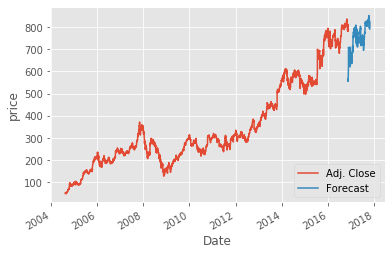

In [371]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()